# Regresión no tempo do Coronavirus
## Estudo sobre a correlación entre 2 variables
### <i> Contaxios vs Falecementos </i>
---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

###  Lectura do ficheiro de datos

In [3]:
#Ficheiro Paises datosCoronavirusSenUsa.csv
#Ficheiro CCAA datosCoronavirusCCAA.csv
aFalec, aContaxios, aPoboacion, aPaises=[],[],[],[]
ficheiros=["datosCoronavirus.csv","datosCoronavirusSenUsa.csv",
           "datosCoronavirusCCAA.csv","datosCoronavirusCCAAsenMC.csv"]

for fic in ficheiros:

    falec, contaxios, poboacion=np.loadtxt(fic, usecols=(1,2,3),
                                delimiter=',',skiprows=1,unpack=True)
    pais=np.loadtxt(fic, usecols=0,dtype=str,
                                  delimiter=',',skiprows=1,unpack=True)
    aFalec.append(falec)
    aContaxios.append(contaxios)
    aPoboacion.append(poboacion)
    aPaises.append(pais)
    

### Xeración do Gráfico

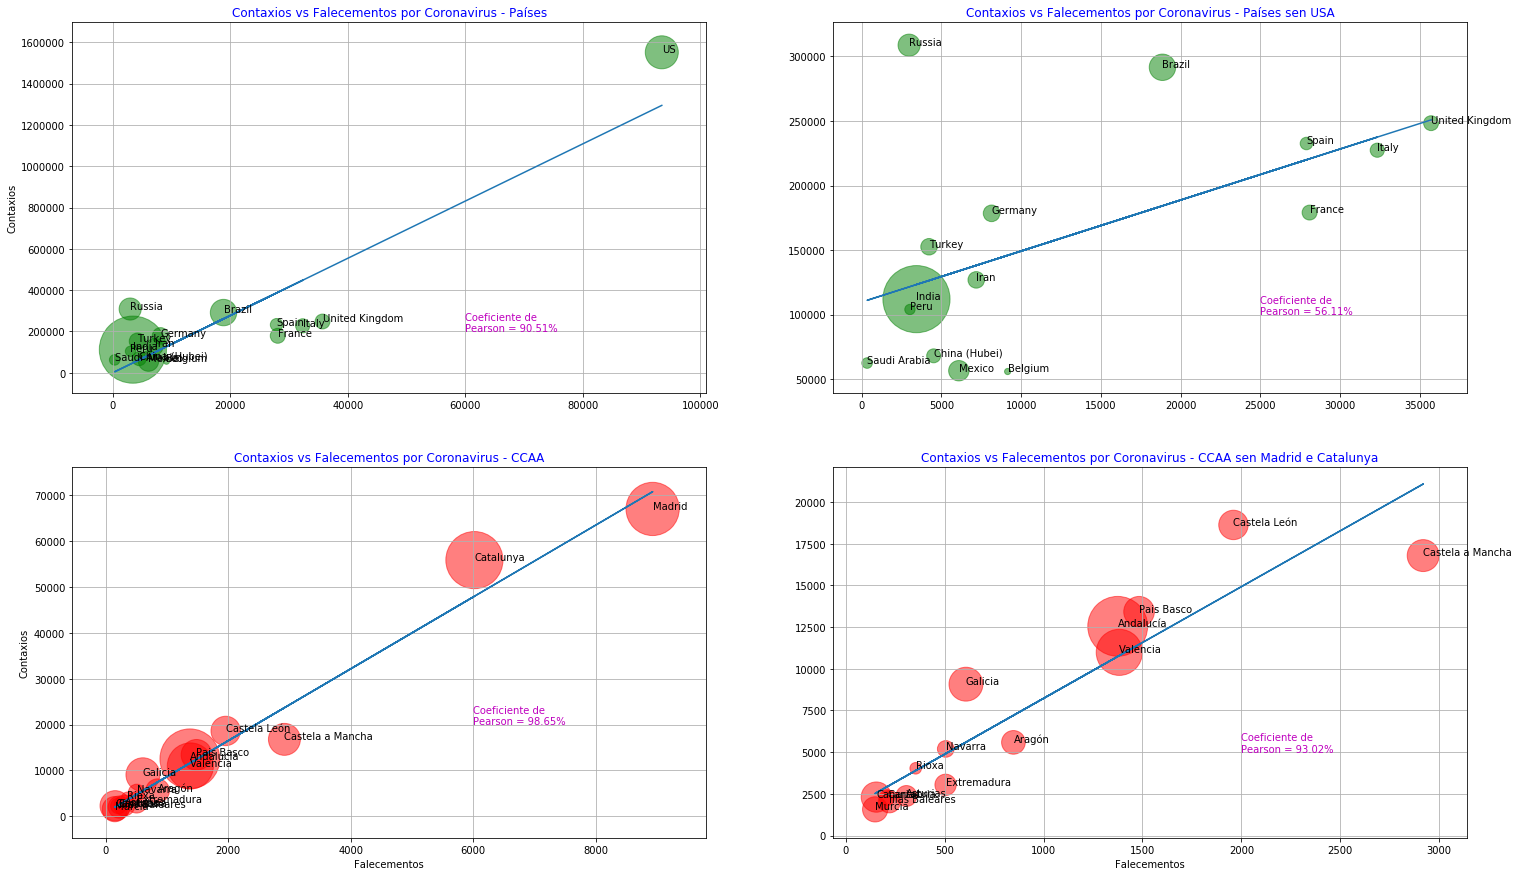

In [13]:
#Inicialización do Gráfico
fig, eixos=plt.subplots(2,2,figsize=(25, 15))

plt.sharey=True
for i in range(2):
    for j in range(2):
        
         #Axuste lineal
        m, n = np.polyfit(aFalec[2*i+j], aContaxios[2*i+j], 1)
        eixos[i,j].plot(aFalec[2*i+j],m*aFalec[2*i+j]+n)

        #Coeficiente de Pearson
        r,_  = stats.pearsonr(aFalec[2*i+j], aContaxios[2*i+j])
        textoAxuste="Coeficiente de \nPearson = {:.2f}%".format(r*100)
        
        #Tamaño dos puntos en función da poboación
        if i==0:
            eixos[i,j].set_xlabel("")
            pob=6000000 #axuste poboación mundial
            cor='g'
            if j==0:
                eixos[i,j].set_ylabel("Contaxios")
                eixos[i,j].text(60000,200000,textoAxuste,size=10,color='m')
                eixos[i,j].set_title("Contaxios vs Falecementos por Coronavirus - Países",color='blue')
                
            else:
                eixos[i,j].set_ylabel("")
                eixos[i,j].text(25000,100000,textoAxuste,size=10,color='m')
                eixos[i,j].set_title("Contaxios vs Falecementos por Coronavirus - Países sen USA",color='blue')
                
            
        else:
            eixos[i,j].set_xlabel("Falecementos")
            pob=47000 #axuste CCAA
            cor='r'
            if j==0:
                eixos[i,j].set_ylabel("Contaxios")
                eixos[i,j].text(6000,20000,textoAxuste,size=10,color='m')
                eixos[i,j].set_title("Contaxios vs Falecementos por Coronavirus - CCAA",color='blue')
            else:
                eixos[i,j].text(2000,5000,textoAxuste,size=10,color='m')   
                eixos[i,j].set_title("Contaxios vs Falecementos por Coronavirus - CCAA sen Madrid e Catalunya",color='blue')
        
        sizePoints=20*(aPoboacion[2*i+j]/pob)
        #Representación das variables
        #Cambiamos a cor por filas
        eixos[i,j].scatter(aFalec[2*i+j],aContaxios[2*i+j],color=cor,alpha=0.5,s=sizePoints)
        #Colocar etiquetas
        for k in range(aPaises[2*i+j].__len__()):
            eixos[i,j].annotate(aPaises[2*i+j][k], (aFalec[2*i+j][k], aContaxios[2*i+j][k]))
        #Mostrar eixos
        eixos[i,j].grid()

       
                
        
